# Dataset exploration


In [1]:
import os

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
from cartopy import crs as ccrs
from fv3viz import pcolormesh_cube, plot_cube_axes, mappable_var


In [7]:
DATA_PATH = '/mnt/disks/scratch/emulation_data/'
TRAIN_PATH = os.path.join(DATA_PATH, 'training/training-subsets/')
VALID_PATH = os.path.join(DATA_PATH, 'testing/validation-subsets/')

TRAIN_ONLINE = os.path.join(TRAIN_PATH, 'training-online-simple-hybedmf/')
VALID_ONLINE = os.path.join(VALID_PATH, 'training-online-simple-hybedmf/')

TRAIN_TENDAY = os.path.join(TRAIN_PATH, 'simple-phys-hybridedmf-10day/')
VALID_TENDAY = os.path.join(VALID_PATH, 'simple-phys-hybridedmf-10day/')

TRAIN_MPHYS = '/mnt/disks/scratch/training/training-subsets/simple-phys-hybridedmf-w-microphysics-12day/'
VALID_MPHYS = '/mnt/disks/scratch/testing/validation-subsets/simple-phys-hybridedmf-w-microphysics-12day/'


#### Some brief notes on dimensions, etc.:

* Each `sample` dimension has these coordinates:
    * `tile` is an int, 0 to 5
    * one `time` per file
    * `x`, `y` are floats, 1 to 48
* 2560 samples per file
* `z` is the other dimension; 79 levels per file _(plus 4 soil levels in offline data)_



#### Get lists of file names in each directory
Note that the lists of file names are NOT sorted alphanumerically (can do that with `sorted([...])`)

###### TODO: what is the meaning of the `window_` naming convention?

In [8]:
# Don't use the online one for now... no cloud mixing ratio!
# train_list_onl = [TRAIN_ONLINE + f for f in os.listdir(TRAIN_ONLINE) if f.endswith('.nc')]
# test_list_onl = [VALID_ONLINE + f for f in os.listdir(VALID_ONLINE) if f.endswith('.nc')]

train_list_ofl = [TRAIN_TENDAY + f for f in os.listdir(TRAIN_TENDAY) if f.endswith('.nc')]
test_list_ofl = [VALID_TENDAY + f for f in os.listdir(VALID_TENDAY) if f.endswith('.nc')]

train_list_mphys = [TRAIN_MPHYS + f for f in os.listdir(TRAIN_MPHYS) if f.endswith('.nc')]
test_list_mphys = [VALID_MPHYS + f for f in os.listdir(VALID_MPHYS) if f.endswith('.nc')]


# print('online: train =', len(train_list_onl), 'files, test =', len(test_list_onl), 'files')
print('offline: train =', len(train_list_ofl), 'files, test =', len(test_list_ofl), 'files')
print('w/ microphysics: train =', len(train_list_mphys), 'files, test =', len(test_list_mphys), 'files')


offline: train = 432 files, test = 144 files
w/ microphysics: train = 12 files, test = 171 files


### Make some sample plots using `fv3viz`

In [4]:
# grab the first file in the offline training set

sample_ds = xr.open_dataset(train_list_ofl[0])
VAR1 = 'cloud_water_mixing_ratio'
VAR2 = 'tendency_of_cloud_water_mixing_ratio_due_to_fv3_physics'


In [5]:
# for plotting - from the fv3viz example script
GRID_PATH = './fv3net/fv3viz/grid.nc'
grid_ds = xr.open_dataset(GRID_PATH)

MAPPABLE_VAR_KWARGS = {
    "coord_x_center": "x",
    "coord_y_center": "y",
    "coord_x_outer": "x_interface",
    "coord_y_outer": "y_interface",
    "coord_vars": {
        "lonb": ["y_interface", "x_interface", "tile"],
        "latb": ["y_interface", "x_interface", "tile"],
        "lon": ["y", "x", "tile"],
        "lat": ["y", "x", "tile"],
    },
}


##### Sample wasn't actually a multi-index?
I had to make it one before unstacking

In [6]:
ds1_unstacked = sample_ds.set_index(sample=['tile', 'time', 'x', 'y']).unstack()
ds1_unstacked


<xarray.Dataset>
Dimensions:                                                  (tile: 6, time: 1, x: 48, y: 48, z: 79, z_soil: 4)
Coordinates:
  * tile                                                     (tile) int64 0 ....
  * time                                                     (time) object 20...
  * x                                                        (x) float64 1.0 ...
  * y                                                        (y) float64 1.0 ...
Dimensions without coordinates: z, z_soil
Data variables:
    cos_day                                                  (tile, time, x, y) float64 ...
    sin_day                                                  (tile, time, x, y) float64 ...
    cos_month                                                (tile, time, x, y) float64 ...
    sin_month                                                (tile, time, x, y) float64 ...
    latitude                                                 (tile, time, x, y) float64 ...
    longitude                                                (tile, time, x, y) float64 ...
    cos_lon                                                  (tile, time, x, y) float64 ...
    sin_lon                                                  (tile, time, x, y) float64 ...
    cos_zenith_angle                                         (tile, time, x, y) float64 ...
    surface_pressure                                         (tile, time, x, y) float64 ...
    surface_temperature                                      (tile, time, x, y) float64 ...
    canopy_water                                             (tile, time, x, y) float64 ...
    sea_ice_thickness                                        (tile, time, x, y) float64 ...
    snow_depth_water_equivalent                              (tile, time, x, y) float64 ...
    vertical_thickness_of_atmospheric_layer                  (z, tile, time, x, y) float64 ...
    pressure_thickness_of_atmospheric_layer                  (z, tile, time, x, y) float64 ...
    eastward_wind                                            (z, tile, time, x, y) float64 ...
    northward_wind                                           (z, tile, time, x, y) float64 ...
    vertical_wind                                            (z, tile, time, x, y) float64 ...
    air_temperature                                          (z, tile, time, x, y) float64 ...
    specific_humidity                                        (z, tile, time, x, y) float64 ...
    cloud_water_mixing_ratio                                 (z, tile, time, x, y) float64 ...
    tendency_of_air_temperature_due_to_fv3_physics           (z, tile, time, x, y) float64 ...
    tendency_of_specific_humidity_due_to_fv3_physics         (z, tile, time, x, y) float64 ...
    tendency_of_eastward_wind_due_to_fv3_physics             (z, tile, time, x, y) float64 ...
    tendency_of_northward_wind_due_to_fv3_physics            (z, tile, time, x, y) float64 ...
    tendency_of_cloud_water_mixing_ratio_due_to_fv3_physics  (z, tile, time, x, y) float64 ...
    total_soil_moisture                                      (z_soil, tile, time, x, y) float64 ...
    liquid_soil_moisture                                     (z_soil, tile, time, x, y) float64 ...
    soil_temperature                                         (z_soil, tile, time, x, y) float64 ...

## Some fv3viz test plots

### plot_cube_axes

In [8]:
zlev = 38

ds1 = mappable_var(xr.merge([ds1_unstacked[VAR1].isel(z=zlev, time=0), grid_ds]), VAR1, 
                   **MAPPABLE_VAR_KWARGS).load()
ds2 = mappable_var(xr.merge([ds1_unstacked[VAR2].isel(z=zlev, time=0), grid_ds]), VAR2, 
                   **MAPPABLE_VAR_KWARGS).load()


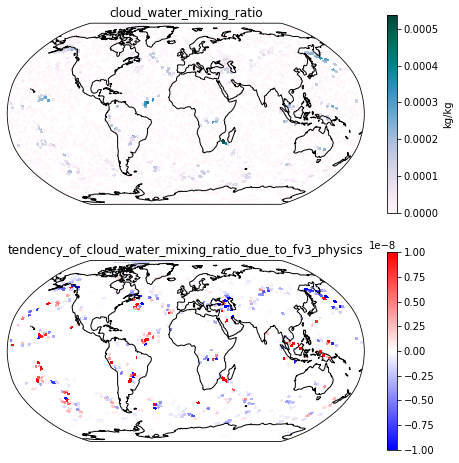

In [9]:
fig, axes = plt.subplots(2, 1, subplot_kw={"projection": ccrs.Robinson()})
h1 = plot_cube_axes(
    ds1[VAR1].values,
    ds1["lat"].values,
    ds1["lon"].values,
    ds1["latb"].values,
    ds1["lonb"].values,
    "pcolormesh",
    cmap="PuBuGn",
    ax=axes[0],
)
axes[0].set_title(VAR1)
axes[0].coastlines()
plt.colorbar(h1, ax=axes[0], label="kg/kg")

h2 = plot_cube_axes(
    ds2[VAR2].values,
    ds2["lat"].values,
    ds2["lon"].values,
    ds2["latb"].values,
    ds2["lonb"].values,
    "pcolormesh",
    vmin=-1e-8,
    vmax=1e-8,
    cmap="bwr",
    ax=axes[1],
)
axes[1].set_title(VAR2)
axes[1].coastlines()
plt.colorbar(h2, ax=axes[1], label="")
fig.set_size_inches([8, 8])


### plot_pcolormesh_cube
(I don't love this one)

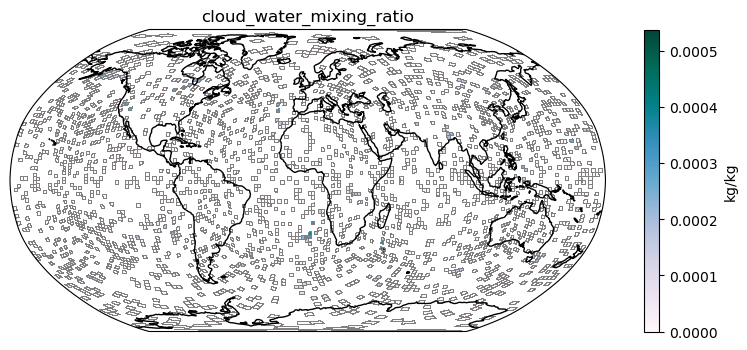

In [10]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.Robinson()})
h = pcolormesh_cube(
    grid_ds["latb"].values,
    grid_ds["lonb"].values,
    ds1_unstacked[VAR1].isel(time=0, z=zlev).values,
#     vmin=-1.0e-4,
#     vmax=1.0e-4,
    cmap="PuBuGn",
    ax=ax,
    edgecolor="grey",
    linewidth=0.01,
)
ax.set_title(VAR1)
ax.coastlines()
plt.colorbar(h, ax=ax, label="kg/kg")
fig.set_size_inches([10, 4])
fig.set_dpi(100)


KeyboardInterrupt: 

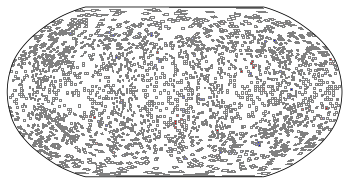

In [11]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.Robinson()})
h = pcolormesh_cube(
    grid_ds["latb"].values,
    grid_ds["lonb"].values,
    ds1_unstacked[VAR2].isel(time=0, z=zlev).values,
    vmin=-1.0e-8,
    vmax=1.0e-8,
    cmap="bwr",
    ax=ax,
    edgecolor="grey",
    linewidth=0.01,
)
ax.set_title(VAR1)
ax.coastlines()
plt.colorbar(h, ax=ax, label="")
fig.set_size_inches([10, 4])
fig.set_dpi(100)


## Test some concatenation

In [7]:
def unstack_sample(path):
    ''' Open dataset & unstack the sample dimension
    '''
    ds = xr.open_dataset(path, chunks=-1)
    ds = ds.set_index(sample=['tile', 'time', 'x', 'y']).unstack()
    
    return ds


In [8]:
n_files = 10
objs = [unstack_sample(f) for f in test_list_ofl[:n_files]]
test_ofl = xr.concat(objs, dim='time')


## Some plots!

In [9]:
VAR1 = 'cloud_water_mixing_ratio'
VAR2 = 'tendency_of_cloud_water_mixing_ratio_due_to_fv3_physics'


#### Histogram

In [10]:
# flatten & remove nans
# TODO: why so many nans??

da1_flat = test_ofl[VAR1].isel(z=38).values.flatten()
da1_nonan = da1_flat[~np.isnan(da1_flat)]


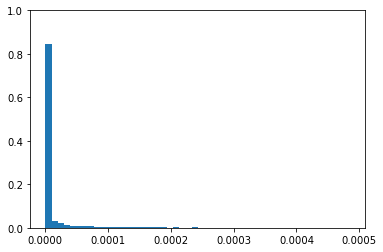

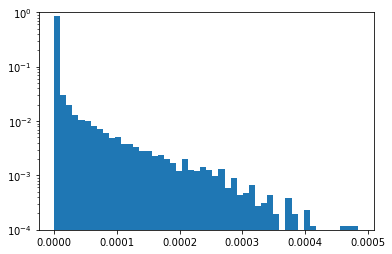

In [11]:
# linear y scale

fig, ax = plt.subplots()
hist, _ = np.histogram(da1_nonan, bins=50, density=False)
wghts = np.ones(np.shape(da1_nonan))*(1/float(len(da1_nonan)))
ax.hist(da1_nonan, bins=50, weights=wghts)
ax.set_ylim(0, 1)
plt.show()

# log y scale

fig, ax = plt.subplots()
hist, _ = np.histogram(da1_nonan, bins=50, density=False)
wghts = np.ones(np.shape(da1_nonan))*(1/float(len(da1_nonan)))
ax.hist(da1_nonan, bins=50, weights=wghts)
ax.set_yscale('log')
ax.set_ylim(1e-4, 1)
plt.show()


#### Vertical profile of the mean

In [12]:
test_means = test_ofl.mean(dim=['tile', 'x', 'y', 'time'])
test_time_mean = test_ofl.mean(dim='time')


In [16]:
test_ofl['vertical_thickness_of_atmospheric_layer']

array([[[[[           nan,            nan,            nan, ...,
                      nan,            nan,            nan],
          [           nan,            nan, -5664.33126483, ...,
           -5580.86175578,            nan, -5561.64524602],
          [           nan,            nan,            nan, ...,
           -5578.09176517,            nan,            nan],
          ...,
          [           nan,            nan,            nan, ...,
           -5533.47558517,            nan,            nan],
          [-5592.51950057,            nan,            nan, ...,
                      nan,            nan,            nan],
          [           nan,            nan,            nan, ...,
           -5526.23120015, -5525.61569889,            nan]],

         [[           nan,            nan, -5658.54590308, ...,
                      nan, -5346.42773831,            nan],
          [           nan,            nan,            nan, ...,
                      nan,            nan,         

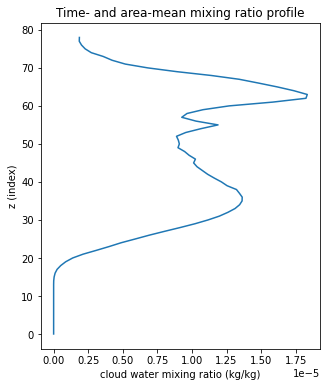

In [51]:
fig, ax = plt.subplots(figsize=(5, 6))

ax.plot(test_means[VAR1], np.arange(0, len(test_means.z)))
ax.set_ylabel('z (index)')
ax.set_xlabel('cloud water mixing ratio (kg/kg)')
ax.set_title('Time- and area-mean mixing ratio profile')
plt.show()


#### Spatial plot of time mean

In [53]:
zlev = 38

ds1 = mappable_var(xr.merge([test_time_mean[VAR1].isel(z=zlev), grid_ds]), VAR1, 
                   **MAPPABLE_VAR_KWARGS).load()

ds2 = mappable_var(xr.merge([test_time_mean[VAR2].isel(z=zlev), grid_ds]), VAR2, 
                   **MAPPABLE_VAR_KWARGS).load()


/home/jmnugent/miniconda3/envs/fv3net/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jmnugent/miniconda3/envs/fv3net/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


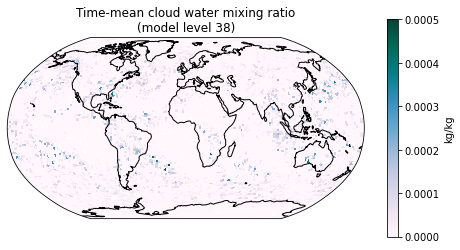

In [55]:
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={"projection": ccrs.Robinson()})

h1 = plot_cube_axes(
    ds1[VAR1].values,
    ds1["lat"].values,
    ds1["lon"].values,
    ds1["latb"].values,
    ds1["lonb"].values,
    "pcolormesh",
    cmap="PuBuGn",
    vmin=0,
    vmax=0.0005,
    ax=ax,
)
ax.set_title('Time-mean cloud water mixing ratio\n(model level {})'.format(zlev))
ax.coastlines()
plt.colorbar(h1, ax=ax, label="kg/kg")

fig.set_size_inches([8, 4])

plt.show()
